
# Importing packages and dataset

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing dataset
df_train=pd.read_csv("Titanic_train.csv")

# Data Cleaning and Data Wrangling 

In [3]:
#Check for null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Calculate frequency for Embarked variable
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
#Replace null value by the highest occuring value
df_train['Embarked'].fillna("S", inplace=True)

In [6]:
#New count
df_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Data Visualization

From the dataset we understand that Sex, Age and Pclass factors played an important role in determining the survival rate. Hence we mainly concentrate on these factor.

In [7]:
print("Minimum value of Age: ",df_train["Age"].min())
print("Maximum value of Age: ",df_train["Age"].max())

Minimum value of Age:  0.42
Maximum value of Age:  80.0


Hence we categorize the people into 8 bins from 0-10,11-20,...and so on till 71-80

In [8]:
df_train["Age_bin"]=np.nan
for x in df_train:
    for i in range(8,0,-1):
        df_train.loc[ df_train["Age"] <= i*10, "Age_bin"] = i

Creating bins for male and female sailors

In [9]:
df_train.loc[df_train["Sex"] =="male", "Sex_Bin"] = 1
df_train.loc[df_train["Sex"] =="female", "Sex_Bin"] = 0

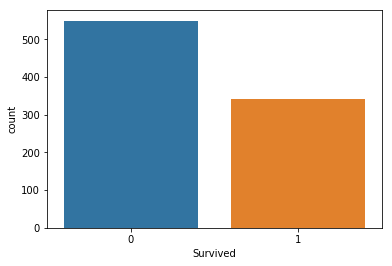

In [10]:
#Overall survival frequency
sns.countplot(x='Survived', data=df_train);

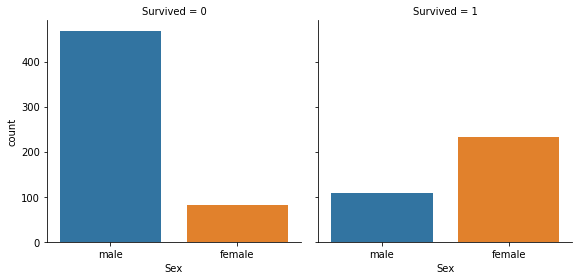

In [11]:
#Survival frequency based on Sex
sns.factorplot(x='Sex', col='Survived', kind='count', data=df_train);

In [12]:
#Survival frequency based on Age, Sex and Pclass
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

# MLE

Applying MLE with respect to Age of survivors

In [13]:
age = df_train["Age"]

In [14]:
smean = age.mean()
rate = 1. / smean

smax = age.max()
days = np.linspace(0., smax, 1000)
dt = smax / 999.

dist_exp = stats.expon.pdf(days, scale=1. / rate)

C:\Users\prith\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\prith\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0,0.5,'Number of survivers')

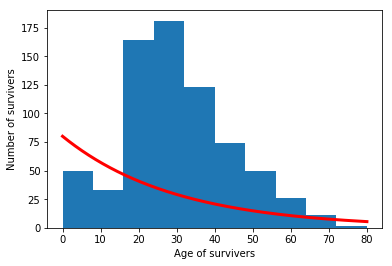

In [15]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(age, range=[0,80])
ax.plot(days, dist_exp * len(age) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("Age of survivers")
ax.set_ylabel("Number of survivers")

From this we understand that, number of people under the curve survived while those above were unfortunate.

Conclusion: <br \>
•	All people in the 1st bin survived <br \>
•	All people in the 2nd bin survived <br \>
•	There were high number of casualties from the 3rd, 4th and 5th bin <br \>
•	There was very less casualty from the 7th bin <br \>
•	Everyone from the 8th bin survived <br \>

In [16]:
#Verification
print("Casualties in 1st bin= ",len(df_train[(df_train["Age_bin"]==1) & (df_train["Survived"]==0)]))
print("Casualties in 2nd bin= ",len(df_train[(df_train["Age_bin"]==2) & (df_train["Survived"]==0)]))
print("Casualties in 7th bin= ",len(df_train[(df_train["Age_bin"]==7) & (df_train["Survived"]==0)]))
print("Casualties in 8th bin= ",len(df_train[(df_train["Age_bin"]==8) & (df_train["Survived"]==0)]))

Casualties in 1st bin=  26
Casualties in 2nd bin=  71
Casualties in 7th bin=  13
Casualties in 8th bin=  4


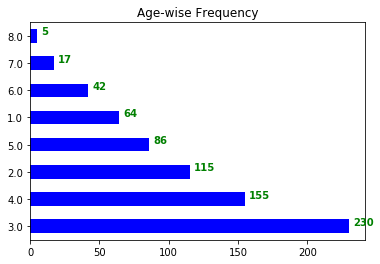

In [17]:
df_train.Age_bin.value_counts().plot(kind='barh', color='blue', title='Age-wise Frequency')
for i, v in enumerate(np.array(df_train.Age_bin.value_counts().tolist())):
    plt.text(v+3 , i+0.05 , str(v), color='green', fontweight='bold')

This proves that our conclusion from the MLE on Age distribution was incorrect. That is not everyone in the 1st, 2nd and 8th bin survived and there were more casualties in the 7th bin. Hence we prove that Age was not the only factor in determining the survival in the Titanic incident. Next we move on to the Pclass of the survivors.

Applying MLE with respect to Pclass of survivors

In [18]:
# fit the data to the gamma distribution:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(df_train['Pclass'])
print(fit_alpha, fit_loc, fit_beta)

220.36354995474665 -10.346002242574713 0.05740860090676614


C:\Users\prith\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


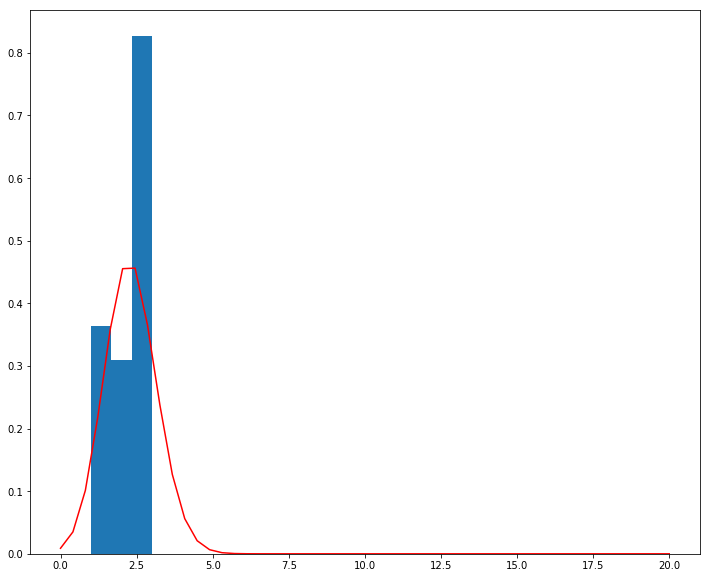

In [19]:
# plot the data and its MLE-derived model
import numpy as np
import matplotlib.pyplot as plt
model = stats.gamma(fit_alpha, loc=fit_loc, scale=fit_beta)  
plt.figure(figsize=(12,10))
_ = plt.hist(df_train['Pclass'], bins=3, normed=True)
x = np.linspace(0,20)
__ = plt.plot(x, model.pdf(x), color='red')

This proves that everyone in the 2 Pclass survived.

In [20]:
#Verification
print("Total sailoer in 2nd Pclass= ",len(df_train[df_train["Pclass"]==2]))
print("Casualties in 2nd Pclass= ",len(df_train[(df_train["Pclass"]==2) & (df_train["Survived"]==0)]))

Total sailoer in 2nd Pclass=  184
Casualties in 2nd Pclass=  97


In [21]:
np.array(df_train.Pclass.value_counts().tolist())

array([491, 216, 184])

In [22]:
type(df_train.Pclass.unique())

numpy.ndarray

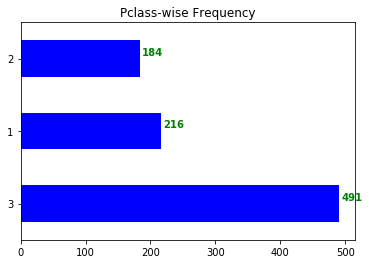

In [23]:
df_train.Pclass.value_counts().plot(kind='barh', color='blue', title='Pclass-wise Frequency')
for i, v in enumerate(np.array(df_train.Pclass.value_counts().tolist())):
    plt.text(v+3 , i+0.05 , str(v), color='green', fontweight='bold')

This proves that around 50% of the sailors in 2nd Pclass could not survive. Next we move to the Sex of the survivors

Applying MLE with respect to Sex of survivors

In [24]:
# fit the data to the gamma distribution:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(df_train['Sex_Bin'])
print(fit_alpha, fit_loc, fit_beta)

201.42690971412944 -6.347196864639214 0.034695664130568085


C:\Users\prith\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


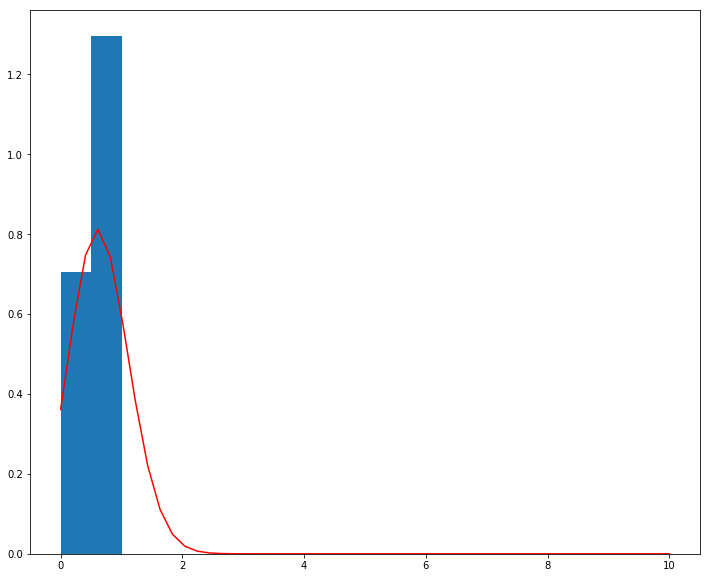

In [25]:
# plot the data and its MLE-derived model
import numpy as np
import matplotlib.pyplot as plt
model = stats.gamma(fit_alpha, loc=fit_loc, scale=fit_beta)  
plt.figure(figsize=(12,10))
_ = plt.hist(df_train['Sex_Bin'], bins=2, normed=True)
x = np.linspace(0,10)
__ = plt.plot(x, model.pdf(x), color='red')

This is a special case, where alpha is very large and hence raising curve is smooth. The location is -6 and hence we see that the curve does not cross the X axis at 0. Also due to very small beta, the curve is short and peaks at 2.5